# Animated Visualization of Random Walks
First we will introduce the discret random walk, which is the foundation of the random processes. Then, we will see how to scale it to a continiuous process. This will enable us to derive a special case Brownian Motion.

In random walk, at each step we take a unit step up or down with equal probability, i.e. with a probability 1/2 we move +1 or -1. Let's implement this simple random walk.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation 


# set a random seed
np.random.seed(1234)

In [2]:
def random_walk(N):
    """
    Simulates a discrete random walk
    :param int N : the number of steps to take
    """
    # event space: set of possible increments
    increments = np.array([1, -1])
    # the probability to generate 1
    p=0.5
    
    # the epsilon values
    random_increments = np.random.choice(increments, N, p)
    # calculate the random walk
    random_walk = np.cumsum(random_increments)
    
    # return the entire walk and the increments
    return random_walk, random_increments

In [3]:
# generate a random walk
N = 500
R, epsilon = random_walk(N)

# normalize the random walk using the Central Limit Theorem
R = R * np.sqrt(1./N)

# Matplotlib Animation
Now, we can make an animation of the random walk using the Matplotlib Animation API.

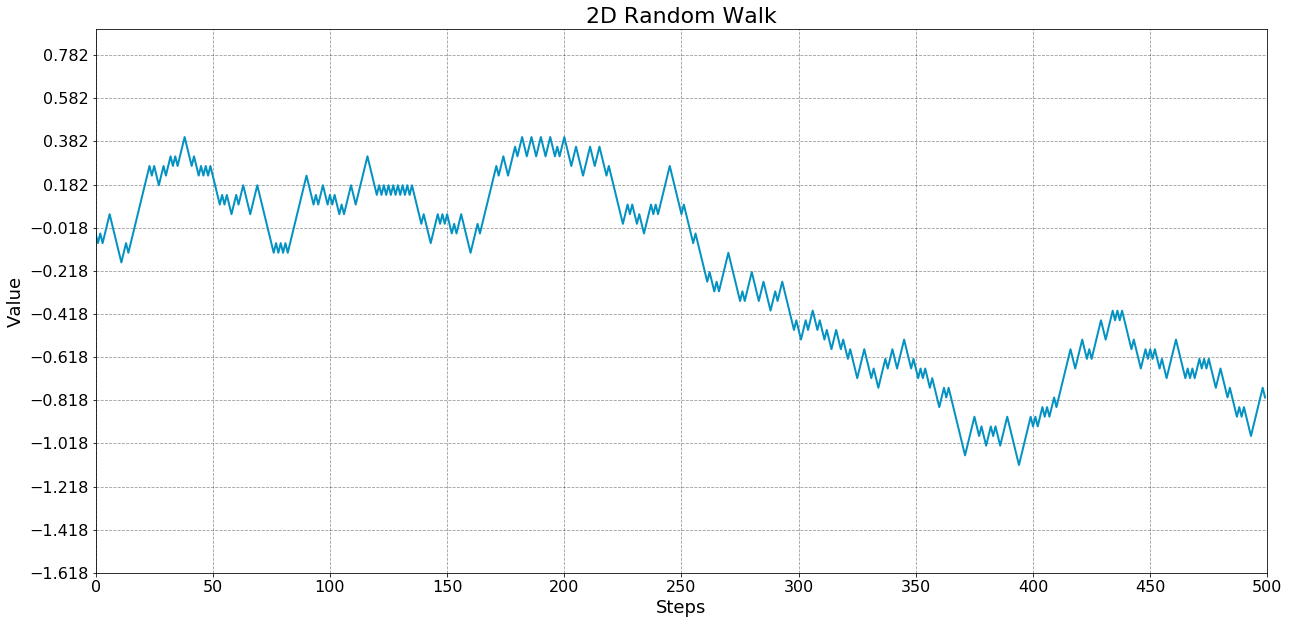

In [5]:
fig = plt.figure(figsize=(21, 10))
ax = plt.axes(xlim=(0, N), ylim=(np.min(R) - 0.5, np.max(R) + 0.5)) 
line, = ax.plot([], [], lw=2, color='#0492C2')
ax.set_xticks(np.arange(0, N+1, 50))
ax.set_yticks(np.arange(np.min(R) - 0.5, np.max(R) + 0.5, 0.2))
ax.set_title('2D Random Walk', fontsize=22)
ax.set_xlabel('Steps', fontsize=18)
ax.set_ylabel('Value', fontsize=18)
ax.tick_params(labelsize=16)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.4)

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], []

# animation function 
def animate(i):
    # x, y values to be plotted 
    y = R[i] 
    
    # appending new points to x, y axes points list 
    xdata.append(i) 
    ydata.append(y) 
    line.set_data(xdata, ydata) 
    return line,

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=N, interval=20, blit=True)
# save the animation as mp4 video file 
anim.save('random_walk.gif',writer='imagemagick') 

# Static Plot of the Random Walk

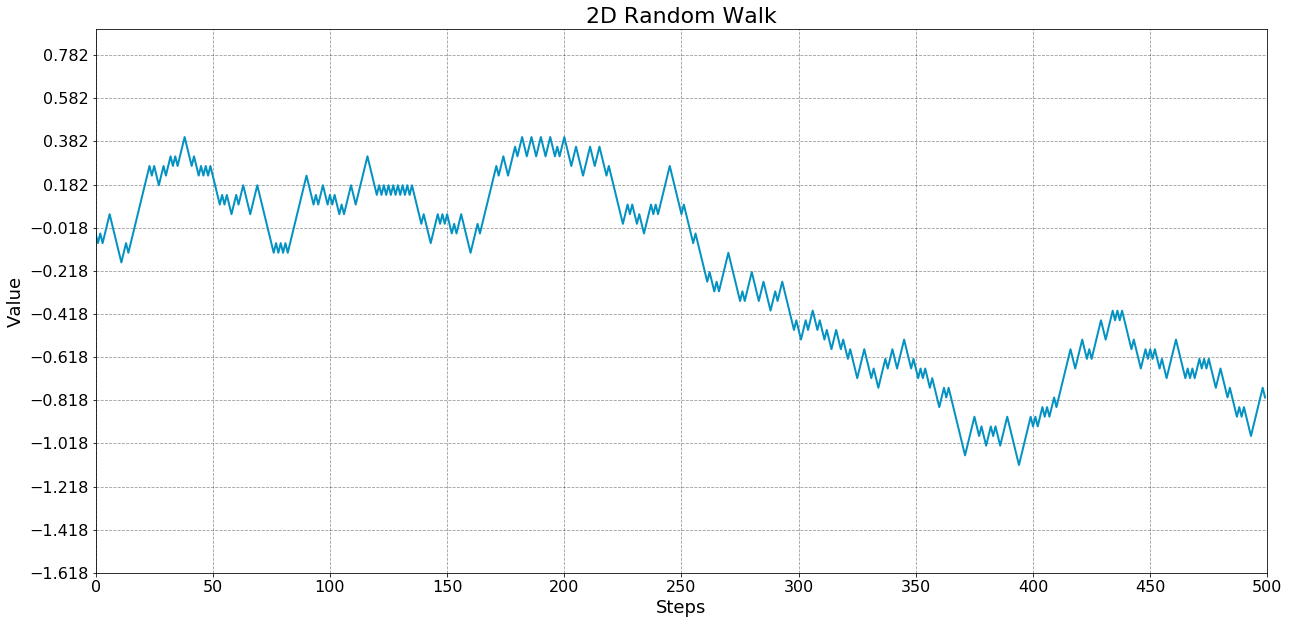

In [7]:
fig = plt.figure(figsize=(21, 10))
ax = plt.axes(xlim=(0, N), ylim=(np.min(R) - 0.5, np.max(R) + 0.5)) 
line, = ax.plot(R, lw=2, color='#0492C2')
ax.set_xticks(np.arange(0, N+1, 50))
ax.set_yticks(np.arange(np.min(R) - 0.5, np.max(R) + 0.5, 0.2))
ax.set_title('2D Random Walk', fontsize=22)
ax.set_xlabel('Steps', fontsize=18)
ax.set_ylabel('Value', fontsize=18)
ax.tick_params(labelsize=16)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.4)

plt.show()

# Central Limit Theorem Simulation

Cool, we simulated a ranom walk. As it can be noticed we applied the Central Limit Theorem, which is transforming the random walk at step *n* into a standard normal distribution (mean 0 and variance 1), although it is a sum of uniform distributions. Let's see numerically that this holds. 

In [8]:
num_simulations = 10000 # num of simulation
N = 100000 # number od steps in each simulation
dt = 1./N # the time step
X_norm = [0] * num_simulations # the normalized random variable

# run the simulations
for i in range(num_simulations):
    X, _ = random_walk(N)
    X_norm[i] = X[N - 1] * np.sqrt(dt)
    
print('The mean is: {0}'.format(np.mean(X_norm)))
print('The var is: {0}'.format(np.var(X_norm)))

The mean is: 0.006437132405038756
The var is: 1.0164140273264002


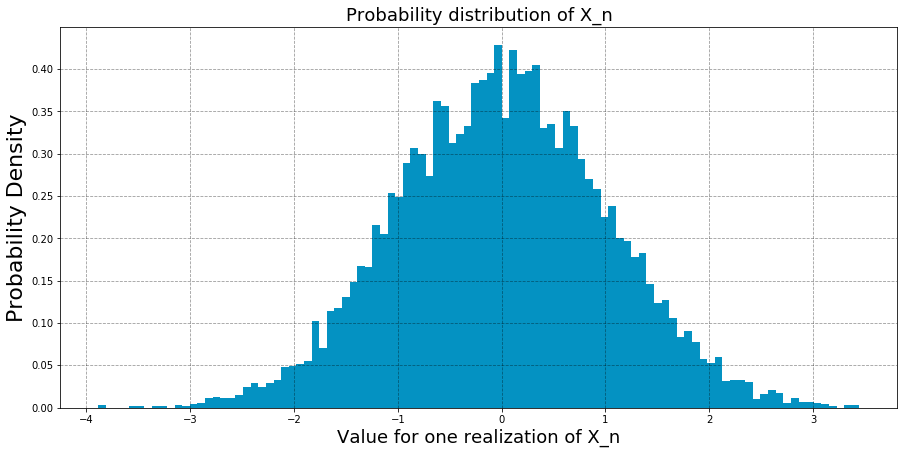

In [10]:
plt.figure(figsize=(15, 7))
plt.grid(True, which='major', linestyle='--', color='black', alpha=0.4)
plt.title('Probability distribution of X_n', fontsize=18)
plt.xlabel('Value for one realization of X_n', fontsize=18)
plt.ylabel('Probability Density', fontsize=22)
plt.hist(X_norm, 100, density=True, color='#0492C2')
plt.savefig("central_limit_theorem_sim.png", dpi=300, bbox_inches='tight')